In [1]:
import sys
sys.path.append('/home/hsher/projects/Metadensity')
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt


# Load encode metadata
I have precompiled list of uID and the .bam, .bigWig files in the following dataframe.

In [2]:
# load IDs
encode_data = pd.read_pickle('~/projects/eclip_encode_id.pickle')
eclip_bam = pd.read_csv('/home/hsher/projects/RBP_annot/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)

# join data
encode_data = pd.merge(eclip_bam[['uID', 'RBP', 'Cell line']], encode_data, left_on = ['RBP', 'Cell line'], right_on = ['RBP', 'cell_line'])

# load RBPs into eCLIP object

I build an eCLIP object that will connect all .bam, .bigWig and .bed (for IDR peaks, individual peaks) together. All you need to do is point a row of the previous dataframe, and use `RBP_centric_approach()` to compute the regions for metagene, and find positive (transcripts with IDR) and negative (transcript w/o any peaks) examples. Building the object will take a while (~1 min) since a lot of I/O.

In [3]:
RPS3 = eCLIP()
RPS3.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'RPS3')&(encode_data['Cell line'] == 'K562')])

finding negative/positive examples


In [4]:
LIN28B = eCLIP()
LIN28B.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'LIN28B')&(encode_data['Cell line'] == 'K562')])

finding negative/positive examples


In [5]:
RPS3_meta = Metatruncate(RPS3, RPS3.idr_transcript, RPS3.name+'_idr')
LIN28B_meta = Metatruncate(LIN28B, LIN28B.idr_transcript, LIN28B.name+'_idr')
for m in [RPS3_meta, LIN28B_meta]:
    m.get_density_array(use_truncation = True)

# Look at first exon for periodicity

In [6]:
# those have multiple 3' utrs; some have non
# those have multiple are "nonsense mediated decay genes"
# those have none are miRNA/snoRNAs
for k in RPS3_meta.metagene.keys():
    #print(m[k].three_utr)
    
    if len(RPS3_meta.metagene[k].three_utr) > 1:
        print(k)
    if len(RPS3_meta.metagene[k].three_utr) < 1:
        print(k, 'zero')

ENST00000614757.4
ENST00000580971.1 zero
ENST00000304979.8
ENST00000364043.1 zero
ENST00000331380.3 zero
ENST00000456793.2
ENST00000422269.1
ENST00000427710.5 zero
ENST00000398295.3 zero
ENST00000409470.5
ENST00000459124.2 zero
ENST00000320912.8
ENST00000645496.1
ENST00000507166.5 zero
ENST00000264218.7
ENST00000394668.2
ENST00000651543.1
ENST00000247655.4
ENST00000519718.1 zero


In [7]:
# None have density
for m in RPS3_meta.metagene.values():
    if np.nansum(m.truncations[RPS3.uID]['rep1']['intron']) > 0:
        print('non empty intron')
    if np.nansum(m.truncations[RPS3.uID]['rep1']['three_utr']) > 0:
        print('non empty 3 UTR')
    
    
    

non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty intron
non empty 3 UTR
non empty 

Text(0.5, 15.0, 'bp in first exon')

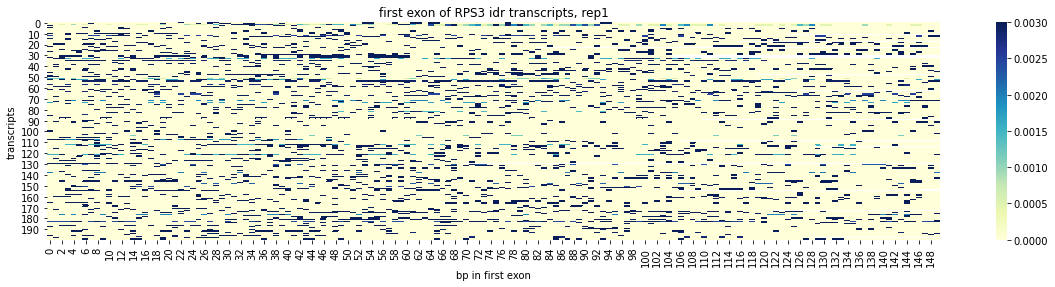

In [8]:
plt.figure(figsize = (20,4))
sns.heatmap(RPS3_meta.truncate_array['first_exon', 'left', 'rep1'], vmin = 0, vmax = 0.003, cmap="YlGnBu")
plt.title('first exon of RPS3 idr transcripts, rep1')
plt.ylabel('transcripts')
plt.xlabel('bp in first exon')

Text(0.5, 15.0, 'bp in first exon')

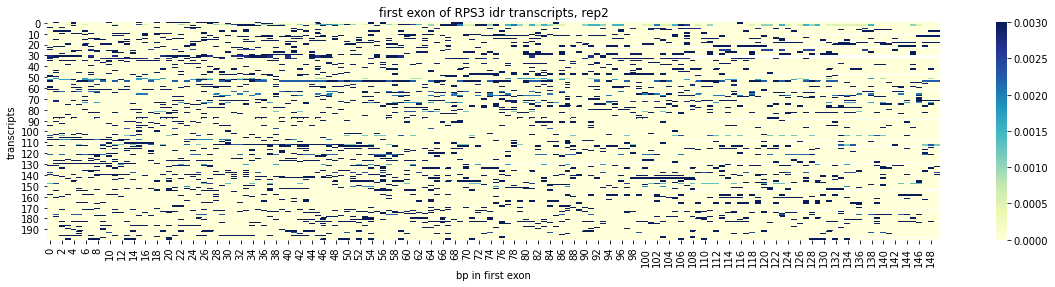

In [9]:
plt.figure(figsize = (20,4))
sns.heatmap(RPS3_meta.truncate_array['first_exon', 'left', 'rep2'], vmin = 0, vmax = 0.003, cmap="YlGnBu")
plt.title('first exon of RPS3 idr transcripts, rep2')
plt.ylabel('transcripts')
plt.xlabel('bp in first exon')

Text(0.5, 15.0, 'bp in first exon')

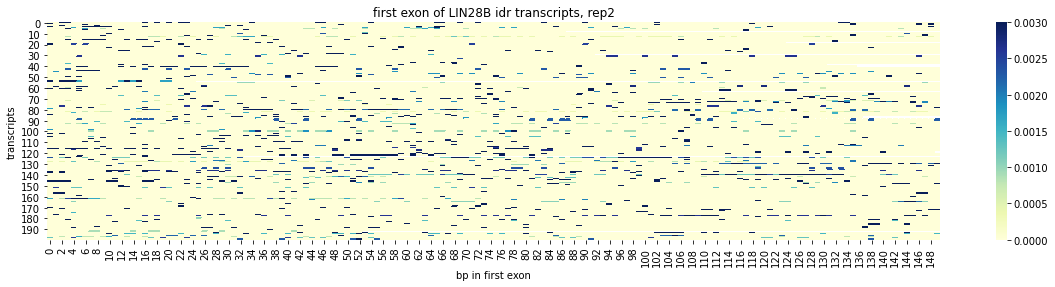

In [10]:
plt.figure(figsize = (20,4))
sns.heatmap(LIN28B_meta.truncate_array['first_exon', 'left', 'rep2'], vmin = 0, vmax = 0.003, cmap="YlGnBu")
plt.title('first exon of LIN28B idr transcripts, rep2')
plt.ylabel('transcripts')
plt.xlabel('bp in first exon')

Text(0.5, 15.0, 'bp in first exon')

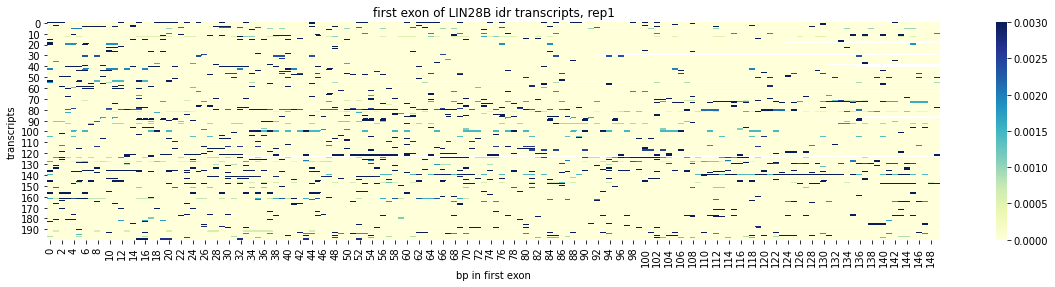

In [11]:
plt.figure(figsize = (20,4))
sns.heatmap(LIN28B_meta.truncate_array['first_exon', 'left', 'rep1'], vmin = 0, vmax = 0.003, cmap="YlGnBu")
plt.title('first exon of LIN28B idr transcripts, rep1')
plt.ylabel('transcripts')
plt.xlabel('bp in first exon')

In [12]:
def get_diff(meta):
    n_example = meta.truncate_array['first_exon', 'left', 'rep1'].shape[0]
    all_diff = []
    for n in range(n_example):
        count = meta.truncate_array['first_exon', 'left', 'rep1'][n,:]
        all_diff += list(np.diff(np.where(count>0)[0]))
    count = Counter(sorted(all_diff))
    for c in count.keys():
        if c%3 == 0:
            plt.bar(c, count[c], color = 'tomato', label = '3n')
        else:
            plt.bar(c, count[c], color = 'lightgrey', label = 'other')
    plt.xlabel('distance between read stop')
    plt.ylabel('count')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.yscale('log')
    plt.title(meta.name)
    

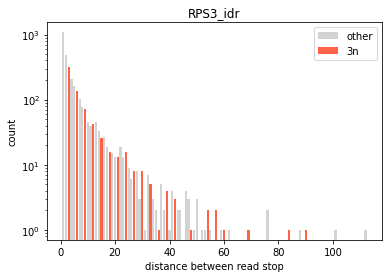

In [13]:
get_diff(RPS3_meta)

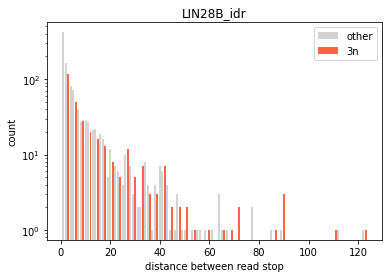

In [14]:
get_diff(LIN28B_meta)

In [15]:
m.truncations['530']

{'rep1': {'five_utr': array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.01408451, 0.        , 0.        , 0.01408451,
         0.        , 0.        , 0.        , 0.        , 0.04225352,
         0.01408451, 0.        , 0.        , 0.        , 0.02816901,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.01408451, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.01408451, 0.01408451,
         0.        , 0.        , 0.        , 0.        , 0.01408451,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.01408451, 0.        , 0.        , 0.        , 0.        ]),
  'first_exo

In [16]:
def get_three_multiples(meta, thres = 0):
    modulo_non_zero_count = {0: 0, 1:0, 2:0}
    modulo_sum = {0: 0, 1:0, 2:0}
    for m in meta.metagene.values():
        den1 = m.truncations[meta.eCLIP.uID]['rep1']['first_exon']
        den2 = m.truncations[meta.eCLIP.uID]['rep2']['first_exon']
        
        for i in range(len(den1)):
            if den1[i] > thres:
                modulo_non_zero_count[i%3]+=1
                modulo_sum[i%3]+=den1[i]
            if den2[i] > thres:
                modulo_non_zero_count[i%3]+=1
                modulo_sum[i%3]+=den2[i]
    f, ax = plt.subplots(1,2)
    ax[0].bar(modulo_sum.keys(), modulo_sum.values())
    ax[0].set_xlabel('pos % 3')
    ax[0].set_ylabel('truncation density sum')
    ax[1].bar(modulo_non_zero_count.keys(), modulo_non_zero_count.values())
    ax[1].set_xlabel('pos % 3')
    ax[1].set_ylabel('site with density > {}'.format(thres))
    plt.suptitle('Enrichment in 3n? ({}; thres = {})'.format(meta.eCLIP.name, thres))
    plt.tight_layout()
                

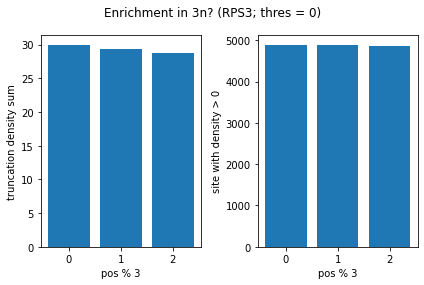

In [17]:
get_three_multiples(RPS3_meta)

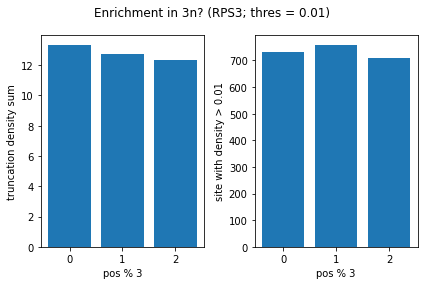

In [18]:
get_three_multiples(RPS3_meta, thres = 0.01)

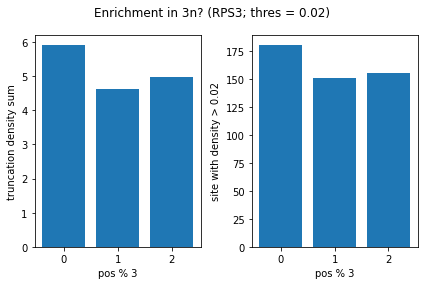

In [19]:
get_three_multiples(RPS3_meta, thres = 0.02)

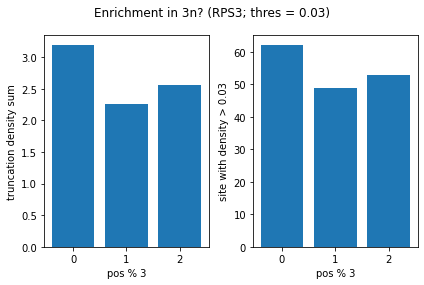

In [20]:
get_three_multiples(RPS3_meta, thres = 0.03)

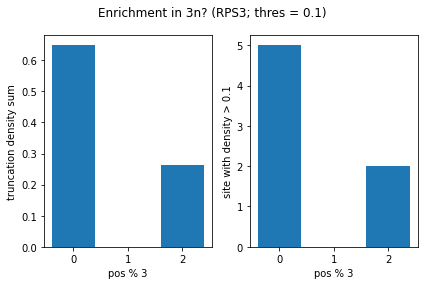

In [21]:
get_three_multiples(RPS3_meta, thres = 0.1)

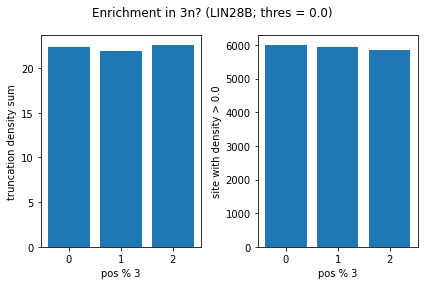

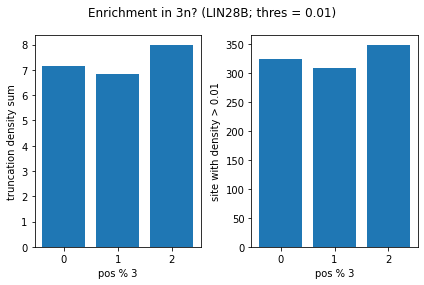

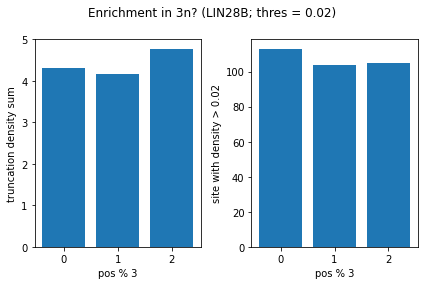

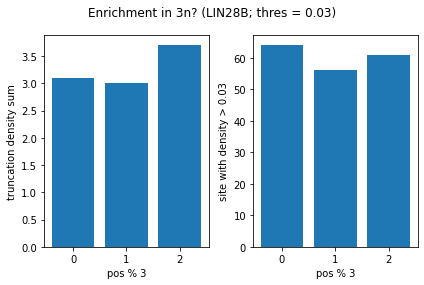

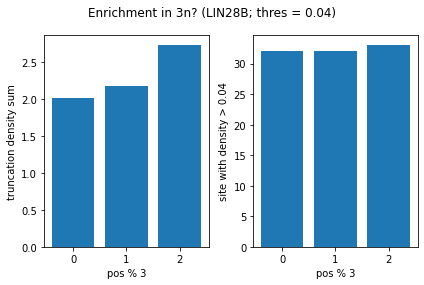

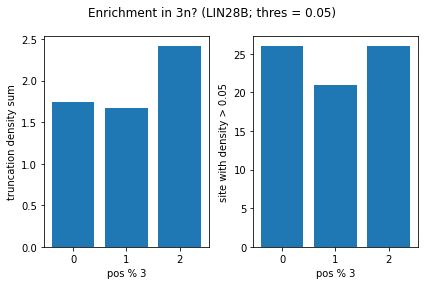

In [22]:
for t in np.linspace(start=0, stop=0.05, num = 6):
    get_three_multiples(LIN28B_meta, thres = t)

Text(0.5, 1.0, 'RPS3, rep1')

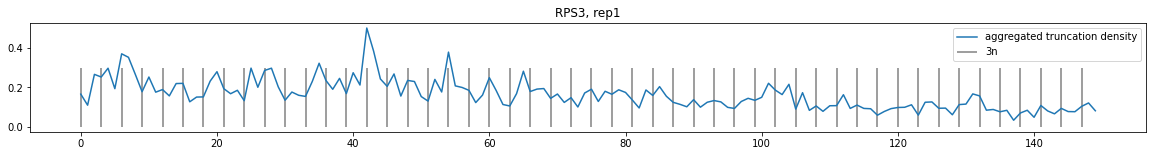

In [23]:
arr = np.nansum(RPS3_meta.truncate_array['first_exon', 'left', 'rep1'], axis = 0)
plt.figure(figsize = (20,2))
plt.plot(arr, label = 'aggregated truncation density')
for x in range(0, len(arr), 3):
    plt.vlines(x, ymin = 0, ymax = 0.3, color = 'grey', label = '3n')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('RPS3, rep1')

Text(0.5, 1.0, 'RPS3, rep2')

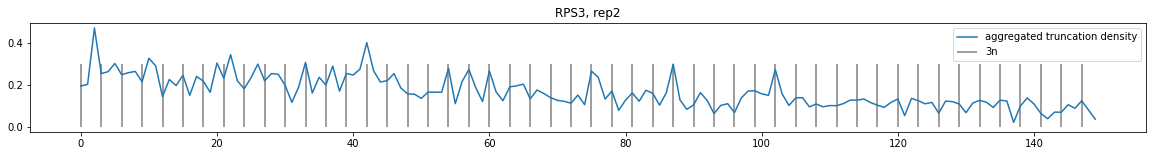

In [24]:
arr = np.nansum(RPS3_meta.truncate_array['first_exon', 'left', 'rep2'], axis = 0)
plt.figure(figsize = (20,2))
plt.plot(arr, label = 'aggregated truncation density')
for x in range(0, len(arr), 3):
    plt.vlines(x, ymin = 0, ymax = 0.3, color = 'grey', label = '3n')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('RPS3, rep2')

Text(0.5, 1.0, 'LIN28B, rep1')

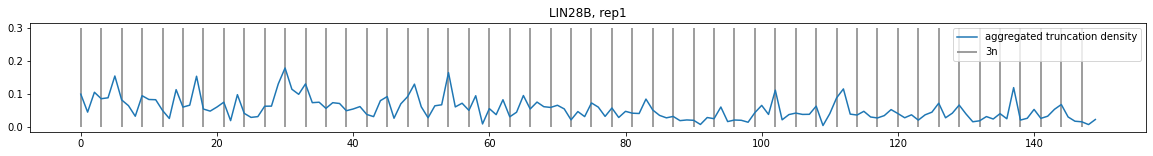

In [25]:
arr = np.nansum(LIN28B_meta.truncate_array['first_exon', 'left', 'rep1'], axis = 0)
plt.figure(figsize = (20,2))
plt.plot(arr, label = 'aggregated truncation density')
for x in range(0, len(arr), 3):
    plt.vlines(x, ymin = 0, ymax = 0.3, color = 'grey', label = '3n')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('LIN28B, rep1')

Text(0.5, 1.0, 'LIN28B, rep2')

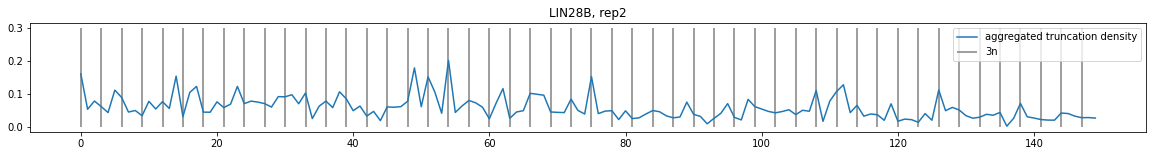

In [26]:
arr = np.nansum(LIN28B_meta.truncate_array['first_exon', 'left', 'rep2'], axis = 0)
plt.figure(figsize = (20,2))
plt.plot(arr, label = 'aggregated truncation density')
for x in range(0, len(arr), 3):
    plt.vlines(x, ymin = 0, ymax = 0.3, color = 'grey', label = '3n')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('LIN28B, rep2')

Text(0.5, 1.0, 'RPS3 one of the 1st exon')

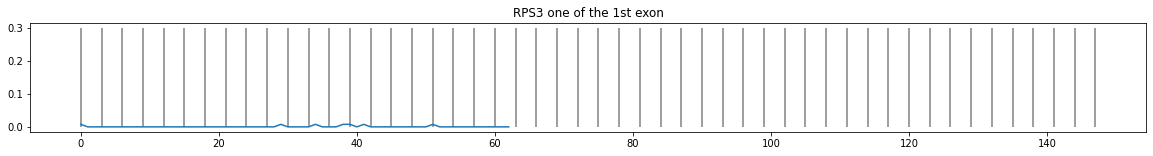

In [27]:
arr = RPS3_meta.truncate_array['first_exon', 'left', 'rep1'][3,:]
plt.figure(figsize = (20,2))
plt.plot(arr)
for x in range(0, len(arr), 3):
    plt.vlines(x, ymin = 0, ymax = 0.3, color = 'grey')
plt.title('RPS3 one of the 1st exon')

Text(0.5, 1.0, 'LIN28B one of the 1st exon')

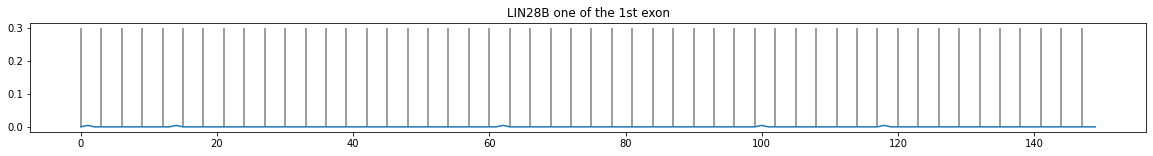

In [28]:
arr = LIN28B_meta.truncate_array['first_exon', 'left', 'rep1'][3,:]
plt.figure(figsize = (20,2))
plt.plot(arr)
for x in range(0, len(arr), 3):
    plt.vlines(x, ymin = 0, ymax = 0.3, color = 'grey')
plt.title('LIN28B one of the 1st exon')

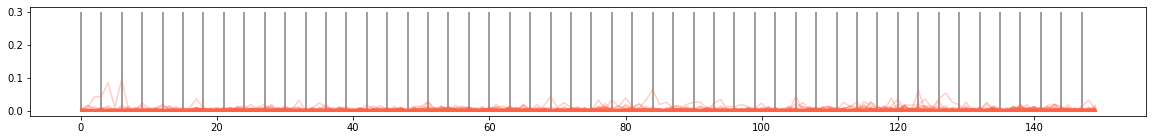

In [29]:
arr = RPS3_meta.truncate_array['exon', 'left', 'rep1'][:,:].T
plt.figure(figsize = (20,2))
plt.plot(arr, alpha = 0.3, color = 'tomato')
for x in range(0, len(arr), 3):
    plt.vlines(x, ymin = 0, ymax = 0.3, color = 'grey')


# Visualize RBP map: individual density per transcript

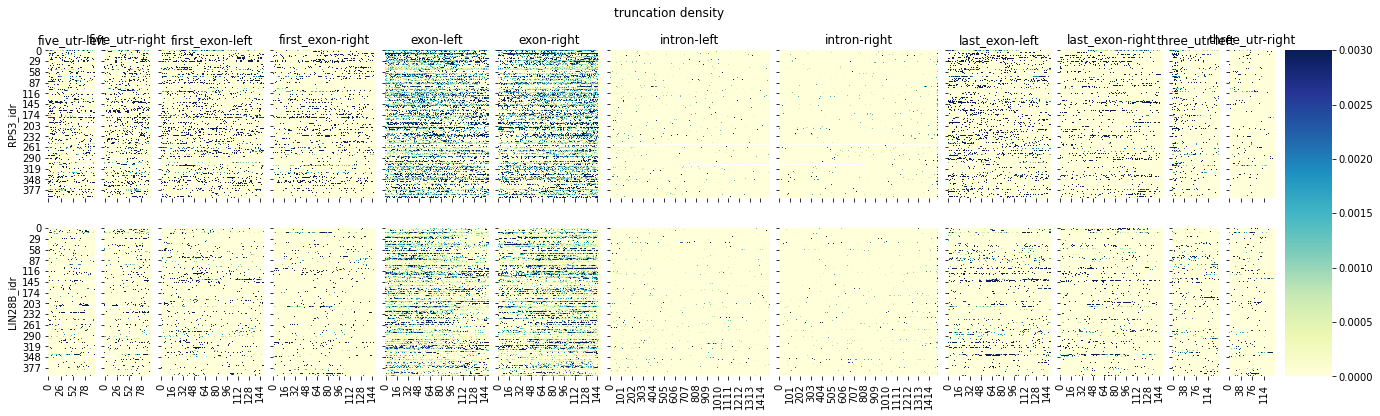

In [30]:
plot_rbp_map([RPS3_meta, LIN28B_meta], truncation = True)

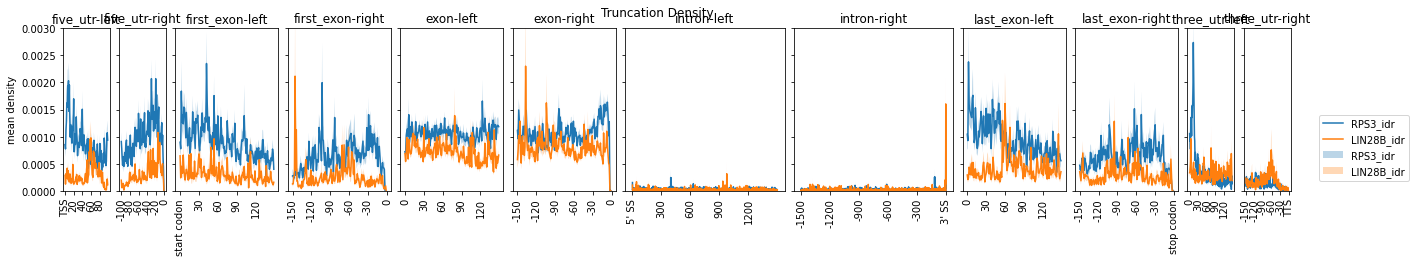

In [31]:
plot_mean_density([RPS3_meta, LIN28B_meta], truncation = True)

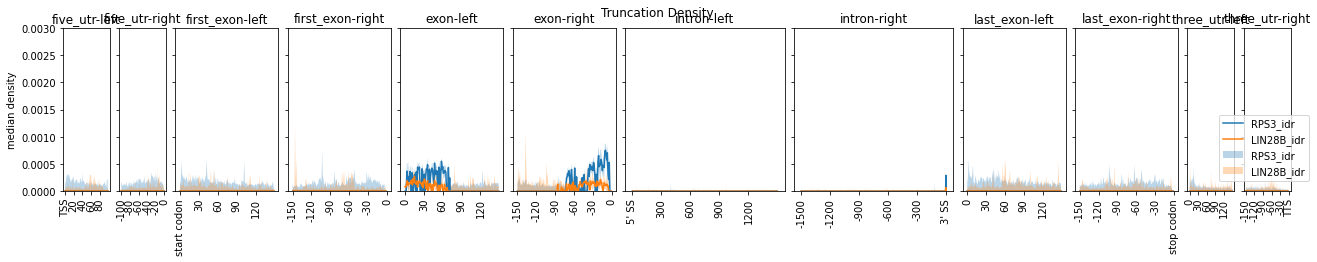

In [32]:
plot_mean_density([RPS3_meta, LIN28B_meta], truncation = True, stat = 'median')